## COVID-19 Data Understanding

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|Date |Date of incident	|
|Province/State |If there is a breakdown in states	|
|Lat |Latitude	|
|Lon |Longitude	|
|Confirmed |Confirmed cases	|
|Recovered |Recovered cases	|
|Deaths |Death cases	|
|Active |Active cases	|

## Summary

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Country Level Analysis

In [2]:
df = pd.read_csv("countrywise.csv")

In [3]:
df

,Country,Confirmed,Deaths,Recovered,Active,New Cases,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Population,Cases / Million People,Confirmed last week,1 week change,1 week % increase
0,Afghanistan,38544,1420,31048,6076,24,3.68,80.55,4.57,38928341,990.0,43851,1639,3.74
1,Albania,10704,322,6284,4098,151,3.01,58.71,5.12,2877800,3720.0,29837,5107,17.12
2,Algeria,47216,1581,33379,12256,278,3.35,70.69,4.74,43851043,1077.0,70629,7396,10.47
3,Andorra,1301,53,938,310,40,4.07,72.10,5.65,77265,16838.0,6018,410,6.81
4,Angola,3092,126,1245,1721,59,4.08,40.27,10.12,32866268,94.0,13922,899,6.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,West Bank and Gaza,27919,192,18466,9261,556,0.69,66.14,1.04,4543126,6145.0,66186,10541,15.93
187,Western Sahara,10,1,8,1,0,10.00,80.00,12.50,597330,17.0,10,0,0.00
188,Yemen,1999,576,1209,214,5,28.81,60.48,47.64,29825968,67.0,2083,41,1.97
189,Zambia,13112,300,11839,973,160,2.29,90.29,2.53,18383956,713.0,17280,255,1.48


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 191 non-null    object 
 1   Confirmed               191 non-null    int64  
 2   Deaths                  191 non-null    int64  
 3   Recovered               191 non-null    int64  
 4   Active                  191 non-null    int64  
 5   New Cases               191 non-null    int64  
 6   Deaths / 100 Cases      191 non-null    float64
 7   Recovered / 100 Cases   191 non-null    float64
 8   Deaths / 100 Recovered  191 non-null    float64
 9   Population              191 non-null    int64  
 10  Cases / Million People  191 non-null    float64
 11  Confirmed last week     191 non-null    int64  
 12  1 week change           191 non-null    int64  
 13  1 week % increase       191 non-null    float64
dtypes: float64(5), int64(8), object(1)
memory 

In [5]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New Cases,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Population,Cases / Million People,Confirmed last week,1 week change,1 week % increase
count,1.910000e+02,191.000000,1.910000e+02,1.910000e+02,191.000000,191.000000,191.000000,191.000,1.910000e+02,191.0,1.910000e+02,1.910000e+02,191.000000
mean,1.458425e+05,4732.125654,9.834962e+04,4.276075e+04,1490.712042,2.788953,71.458534,inf,1.126747e+07,inf,2.945683e+05,2.162244e+04,7.288482
std,6.443462e+05,18857.883062,4.103525e+05,2.844920e+05,7857.399265,3.302730,25.249672,NaN,2.337136e+08,NaN,1.166047e+06,9.640267e+04,7.676319
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000,-2.147484e+09,-2080.0,1.000000e+00,0.000000e+00,0.000000
25%,1.895500e+03,35.000000,1.122500e+03,3.090000e+02,3.500000,0.990000,61.075000,1.415,2.023465e+06,325.5,3.960500e+03,5.700000e+01,1.705000
50%,9.108000e+03,176.000000,5.991000e+03,1.847000e+03,80.000000,2.070000,79.580000,2.820,8.737370e+06,1547.0,2.778500e+04,1.112000e+03,4.680000
75%,6.162050e+04,1065.500000,4.161750e+04,1.058750e+04,545.000000,3.255000,90.245000,5.065,3.044946e+07,5345.5,1.232870e+05,1.027400e+04,10.455000
max,6.351756e+06,190923.000000,3.611632e+06,3.773354e+06,95735.000000,28.810000,100.000000,inf,4.287241e+08,inf,1.154199e+07,1.230667e+06,43.500000


In [6]:
df.columns

Index(['Country', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New Cases', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'Population', 'Cases / Million People', 'Confirmed last week', '1 week change', '1 week % increase'], dtype='object')

## Data Visualization

### Univariate Data Exploration

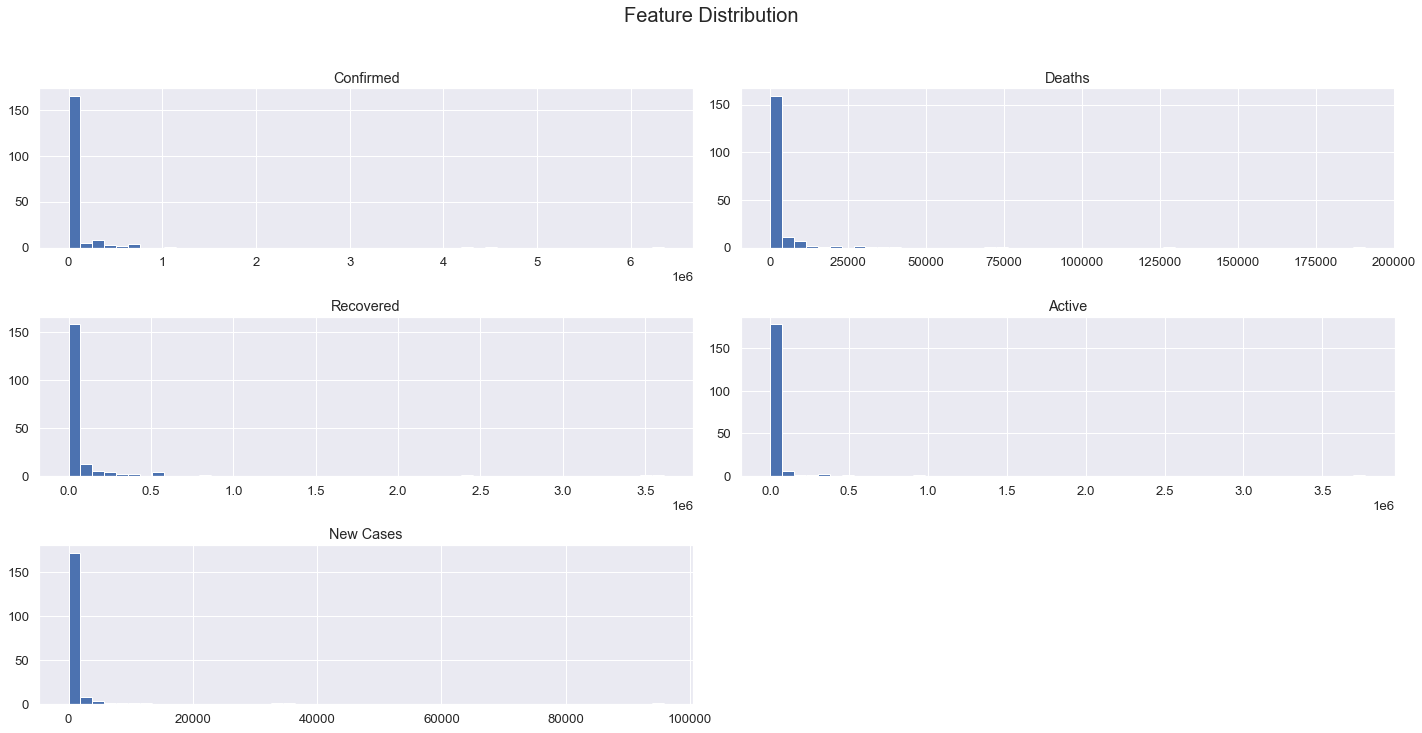

In [7]:
df[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New Cases']].hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

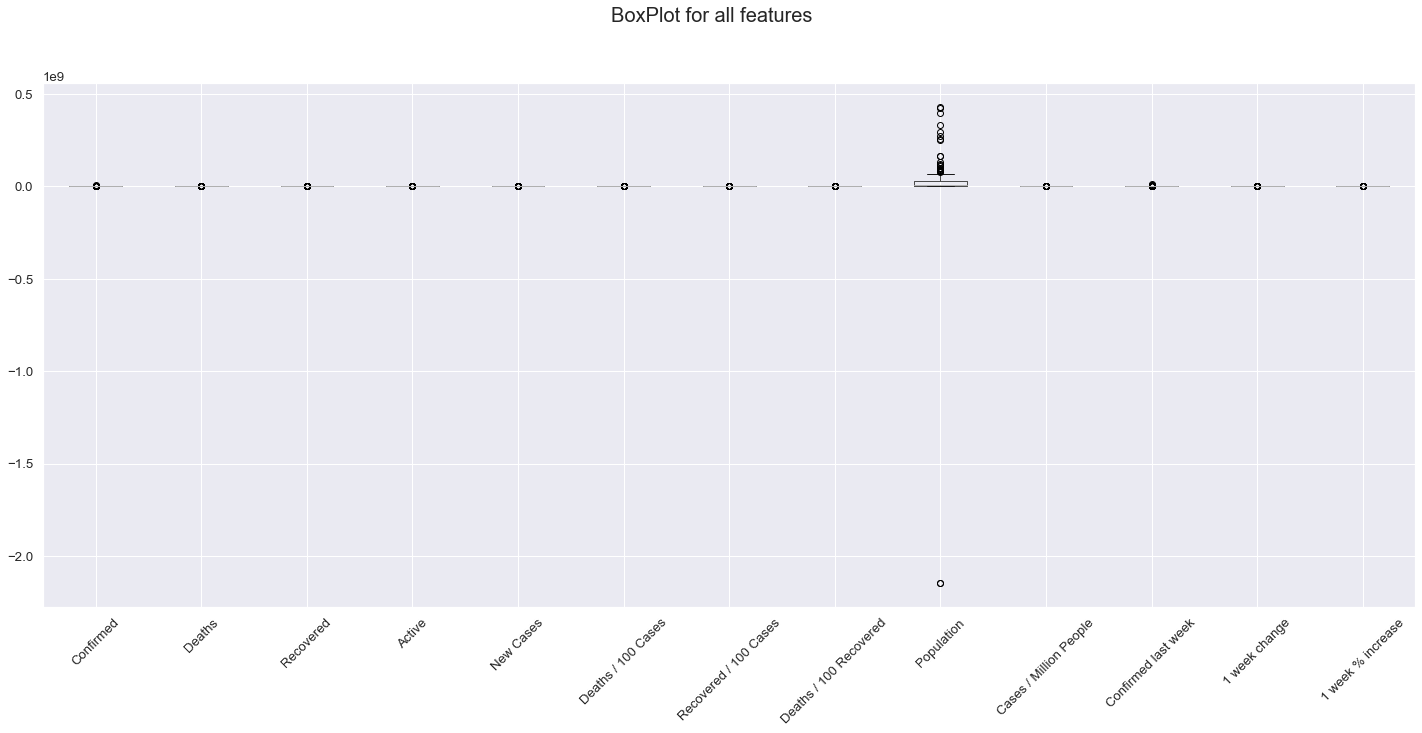

In [8]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot for all features', x=0.5, y=1.02, ha='center', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
df.columns

Index(['Country', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New Cases', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'Population', 'Cases / Million People', 'Confirmed last week', '1 week change', '1 week % increase'], dtype='object')

In [10]:
top5confirm = df.nlargest(5,'Confirmed')
top5confirm

,Country,Confirmed,Deaths,Recovered,Active,New Cases,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Population,Cases / Million People,Confirmed last week,1 week change,1 week % increase
176,US,6351756,190923,2387479,3773354,33895,3.01,37.59,8.00,330541757,19216.0,11541986,1230667,10.66
79,India,4465863,75062,3471783,919018,95735,1.68,77.74,2.16,-2147483648,-2080.0,8958483,308222,3.44
23,Brazil,4197889,128539,3611632,457718,35816,3.06,86.03,3.56,422706534,9931.0,5945849,220757,3.71
141,Russia,1037526,18080,854069,165377,5172,1.74,82.32,2.12,292579178,3546.0,1975629,168600,8.53
135,Peru,696190,30123,536959,129108,4615,4.33,77.13,5.61,65597846,10613.0,939931,12508,1.33


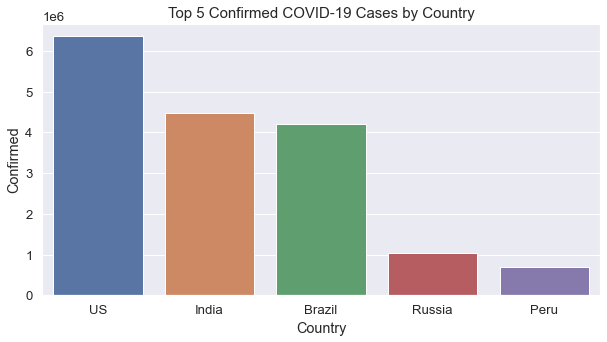

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x=top5confirm.Country, y=top5confirm.Confirmed, data=top5confirm, ci=None)
plt.title("Top 5 Confirmed COVID-19 Cases by Country", fontsize=15)
plt.show()

In [12]:
top5deaths = df.nlargest(5,'Deaths')
top5deaths

,Country,Confirmed,Deaths,Recovered,Active,New Cases,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Population,Cases / Million People,Confirmed last week,1 week change,1 week % increase
176,US,6351756,190923,2387479,3773354,33895,3.01,37.59,8.00,330541757,19216.0,11541986,1230667,10.66
23,Brazil,4197889,128539,3611632,457718,35816,3.06,86.03,3.56,422706534,9931.0,5945849,220757,3.71
79,India,4465863,75062,3471783,919018,95735,1.68,77.74,2.16,-2147483648,-2080.0,8958483,308222,3.44
114,Mexico,647321,69049,538514,39758,4461,10.67,83.19,12.82,255584572,2533.0,1015071,55416,5.46
180,United Kingdom,357613,41683,1831,314099,2681,11.66,0.51,2276.52,134856358,2652.0,1434004,126868,8.85


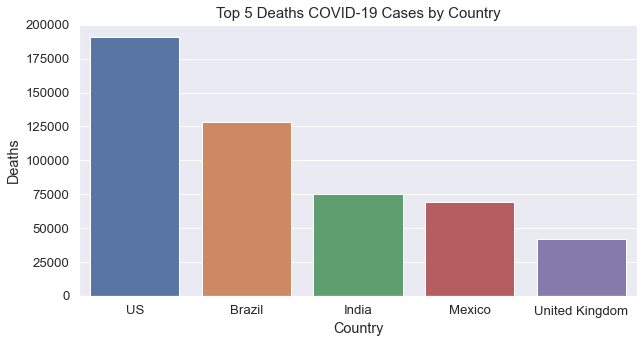

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x=top5deaths.Country, y=top5deaths.Deaths, data=top5deaths, ci=None)
plt.title("Top 5 Deaths COVID-19 Cases by Country", fontsize=15)
plt.show()

In [14]:
top5recover = df.nlargest(5,'Recovered')
top5recover

,Country,Confirmed,Deaths,Recovered,Active,New Cases,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Population,Cases / Million People,Confirmed last week,1 week change,1 week % increase
23,Brazil,4197889,128539,3611632,457718,35816,3.06,86.03,3.56,422706534,9931.0,5945849,220757,3.71
79,India,4465863,75062,3471783,919018,95735,1.68,77.74,2.16,-2147483648,-2080.0,8958483,308222,3.44
176,US,6351756,190923,2387479,3773354,33895,3.01,37.59,8.00,330541757,19216.0,11541986,1230667,10.66
141,Russia,1037526,18080,854069,165377,5172,1.74,82.32,2.12,292579178,3546.0,1975629,168600,8.53
158,South Africa,642431,15168,569935,57328,1990,2.36,88.72,2.66,59308690,10832.0,757144,18358,2.42


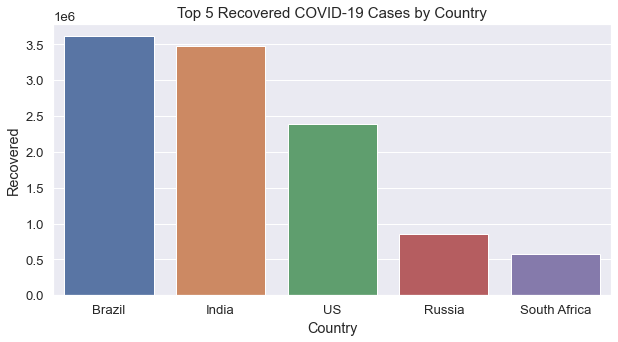

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x=top5recover.Country, y=top5recover.Recovered, data=top5recover, ci=None)
plt.title("Top 5 Recovered COVID-19 Cases by Country", fontsize=15)
plt.show()

In [16]:
top5active = df.nlargest(5,'Active')
top5active

,Country,Confirmed,Deaths,Recovered,Active,New Cases,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Population,Cases / Million People,Confirmed last week,1 week change,1 week % increase
176,US,6351756,190923,2387479,3773354,33895,3.01,37.59,8.00,330541757,19216.0,11541986,1230667,10.66
79,India,4465863,75062,3471783,919018,95735,1.68,77.74,2.16,-2147483648,-2080.0,8958483,308222,3.44
23,Brazil,4197889,128539,3611632,457718,35816,3.06,86.03,3.56,422706534,9931.0,5945849,220757,3.71
160,Spain,543379,29628,150376,363375,8866,5.45,27.67,19.70,93691843,5800.0,1525341,79725,5.23
180,United Kingdom,357613,41683,1831,314099,2681,11.66,0.51,2276.52,134856358,2652.0,1434004,126868,8.85


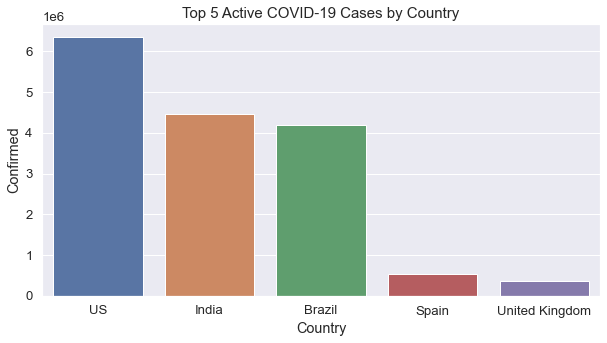

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x=top5active.Country, y=top5active.Confirmed, data=top5active, ci=None)
plt.title("Top 5 Active COVID-19 Cases by Country", fontsize=15)
plt.show()

In [18]:
top5new = df.nlargest(5,'New Cases')
top5new

,Country,Confirmed,Deaths,Recovered,Active,New Cases,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Population,Cases / Million People,Confirmed last week,1 week change,1 week % increase
79,India,4465863,75062,3471783,919018,95735,1.68,77.74,2.16,-2147483648,-2080.0,8958483,308222,3.44
23,Brazil,4197889,128539,3611632,457718,35816,3.06,86.03,3.56,422706534,9931.0,5945849,220757,3.71
176,US,6351756,190923,2387479,3773354,33895,3.01,37.59,8.00,330541757,19216.0,11541986,1230667,10.66
6,Argentina,512293,10658,382490,119145,12259,2.08,74.66,2.79,45195777,11335.0,1339337,51051,3.81
62,France,383292,30805,89242,263245,9574,8.04,23.28,34.52,68151730,5624.0,2115717,106157,5.02


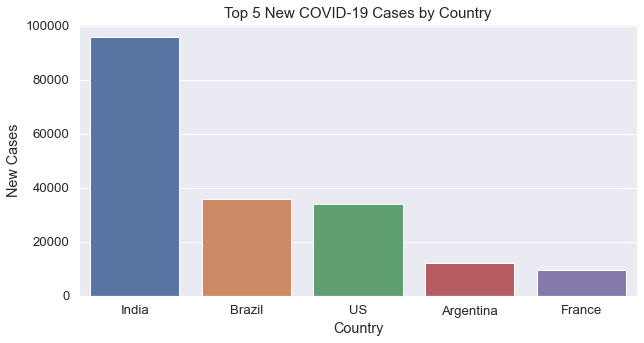

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x=top5new.Country, y=top5new["New Cases"], data=top5new, ci=None)
plt.title("Top 5 New COVID-19 Cases by Country", fontsize=15)
plt.show()

### Correlation

In [20]:
df.corr()

,Confirmed,Deaths,Recovered,Active,New Cases,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Population,Cases / Million People,Confirmed last week,1 week change,1 week % increase
Confirmed,1.000000,0.936001,0.932637,0.857617,0.825854,0.031429,-0.036253,0.024084,-0.170678,0.180906,0.982705,0.862295,-0.027654
Deaths,0.936001,1.000000,0.836808,0.846648,0.666371,0.159575,-0.088433,0.147513,-0.006591,0.184430,0.922572,0.872050,-0.010358
Recovered,0.932637,0.836808,1.000000,0.614458,0.886462,0.016286,0.040626,-0.019543,-0.248159,0.142873,0.896067,0.643835,-0.054114
Active,0.857617,0.846648,0.614458,1.000000,0.547669,0.037116,-0.134847,0.072943,-0.028186,0.191407,0.872085,0.966537,0.016109
New Cases,0.825854,0.666371,0.886462,0.547669,1.000000,0.009933,-0.023594,0.011782,-0.494192,0.054945,0.851942,0.549495,-0.045721
Deaths / 100 Cases,0.031429,0.159575,0.016286,0.037116,0.009933,1.000000,-0.238857,0.266920,0.016635,-0.069147,0.066196,0.081358,-0.038357
Recovered / 100 Cases,-0.036253,-0.088433,0.040626,-0.134847,-0.023594,-0.238857,1.000000,-0.267296,-0.051298,0.119342,-0.082926,-0.120870,-0.071958
Deaths / 100 Recovered,0.024084,0.147513,-0.019543,0.072943,0.011782,0.266920,-0.267296,1.000000,0.040337,-0.019276,0.075681,0.084290,0.017911
Population,-0.170678,-0.006591,-0.248159,-0.028186,-0.494192,0.016635,-0.051298,0.040337,1.000000,0.076065,-0.211527,0.002100,0.054895
Cases / Million People,0.180906,0.184430,0.142873,0.191407,0.054945,-0.069147,0.119342,-0.019276,0.076065,1.000000,0.160043,0.171400,-0.112614


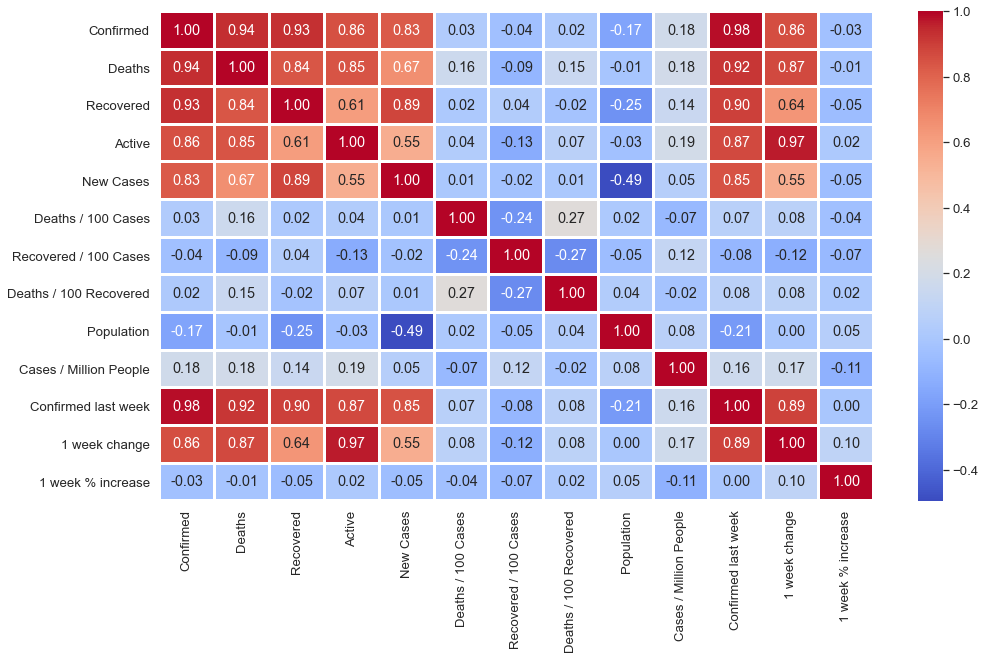

In [21]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()